In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
mcd=pd.read_csv('Documents/Data file.csv')

In [3]:
mcd

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
mcd.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
mcd.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [6]:
mcd.sample(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
70936,70937,0,05090I94571,1415.0,50.418667,50.418667,4648.00,4648.00,2.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-28
166536,166537,1,34135I88648,594.0,16215.000000,18512.790000,7435.00,8264.46,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,1.500000,32.000000,UPW,2016-08-09
19365,19366,0,26609I82730,1811.0,-0.139333,-0.139333,6542.46,6542.46,54.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-19
42521,42522,1,79141I82730,795.0,34350.000000,36145.000000,4478.24,6035.07,2.0,0.0,...,6.0,0.0,23.0,138,6,0.0,2.181818,2.347826,UPW,2016-07-31
28604,28605,0,23269I70785,145.0,0.405333,0.405333,0.00,0.00,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [7]:
mcd.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [8]:
mcd.shape

(209593, 37)

In [9]:
mcd.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [10]:
mcd.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [11]:
mcd=pd.DataFrame(data=mcd)

In [12]:
mcd

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [13]:
mcd.isnull()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209589,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
mcd.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [15]:
mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [16]:
mcd.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [17]:
mcd.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

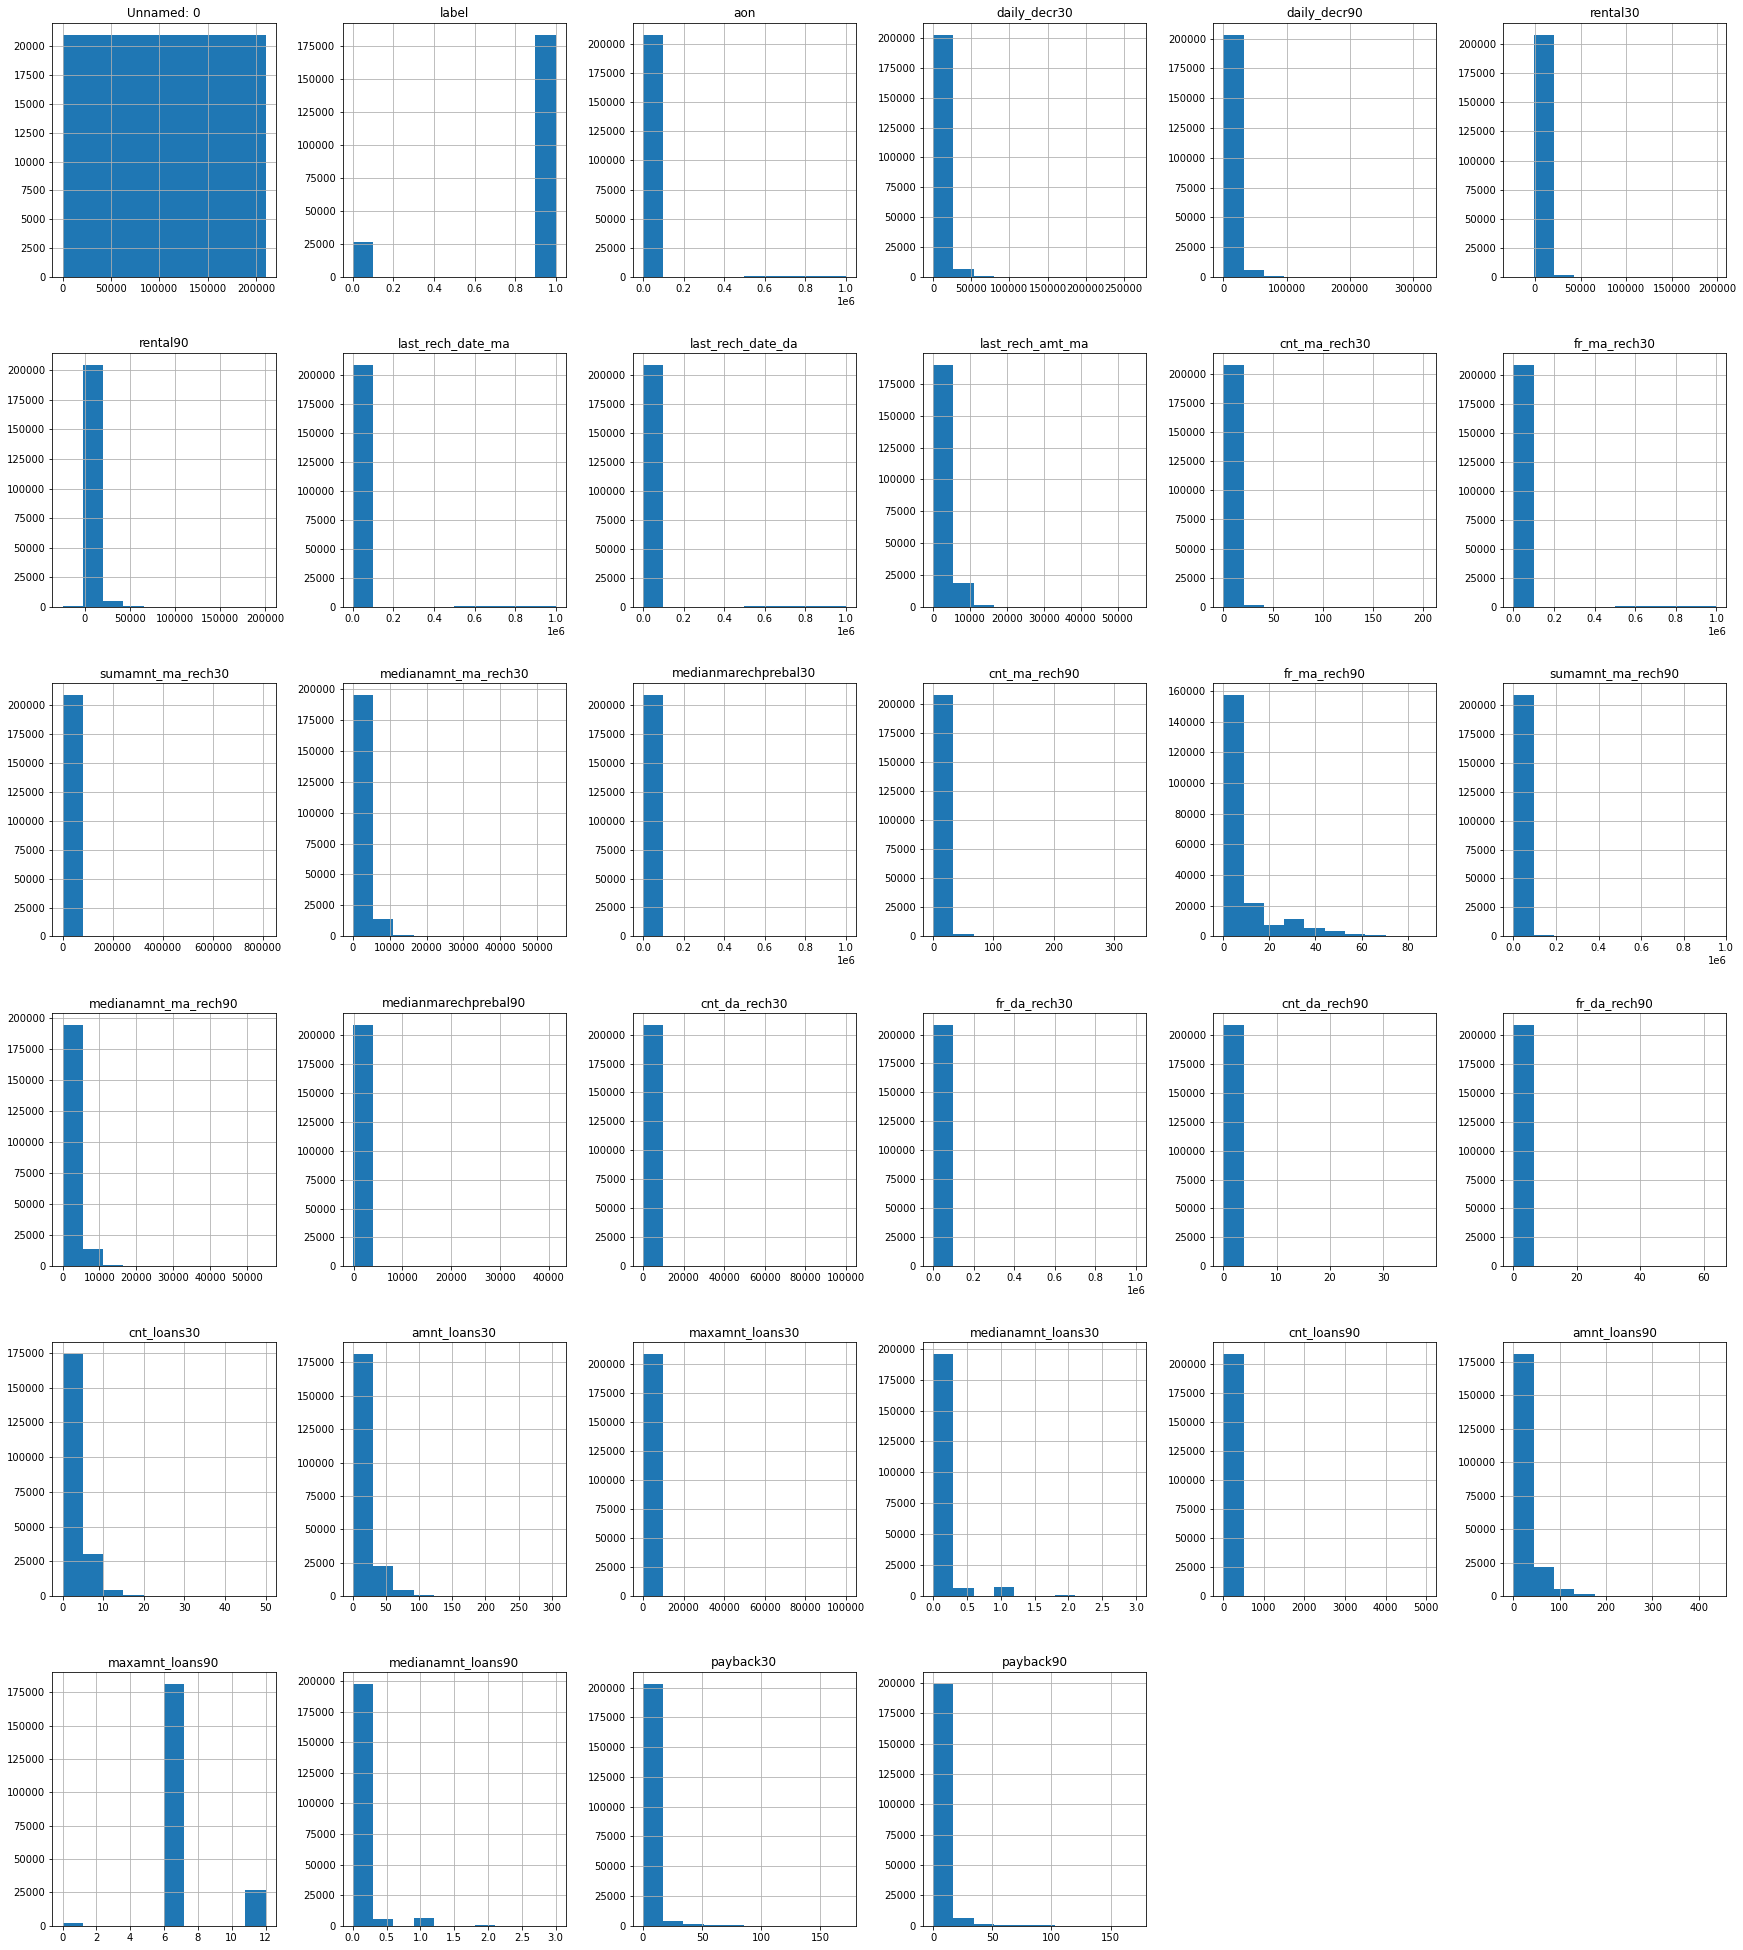

In [18]:
mcd.hist(figsize=(30,35));

In [19]:
mcd.drop(columns='Unnamed: 0', inplace =True)

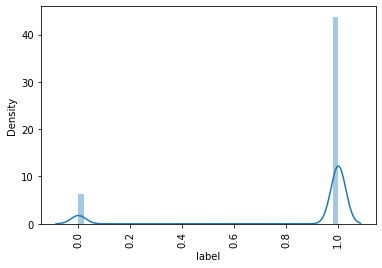

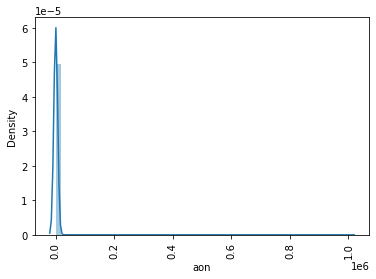

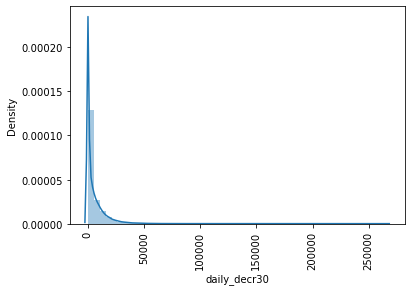

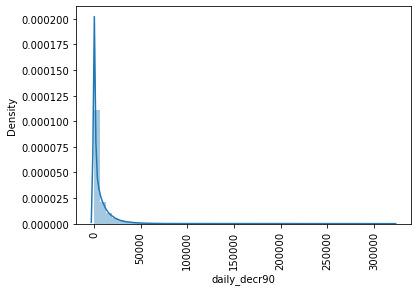

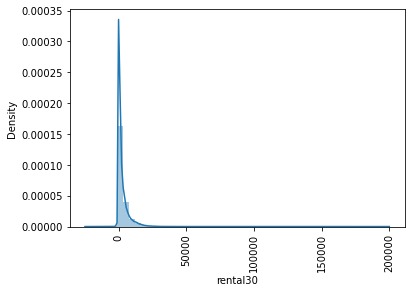

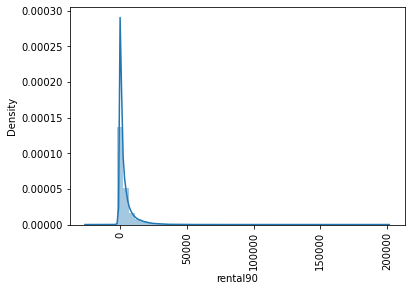

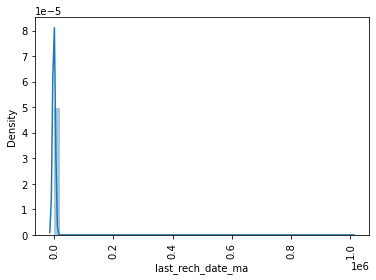

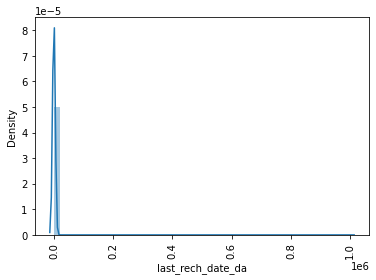

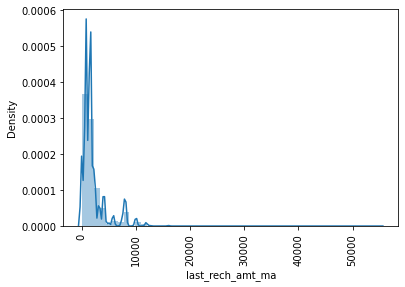

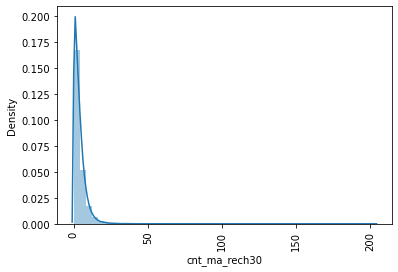

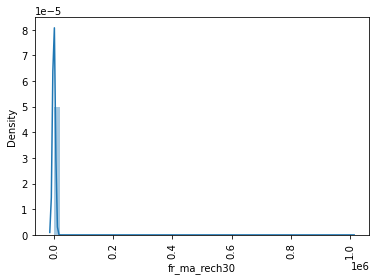

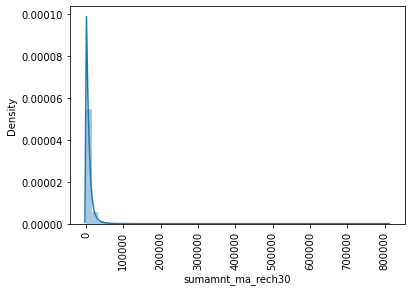

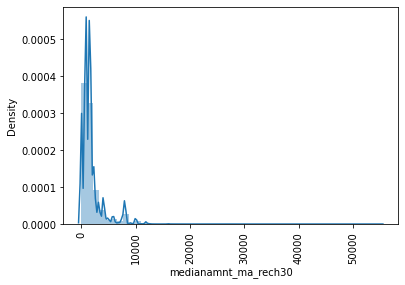

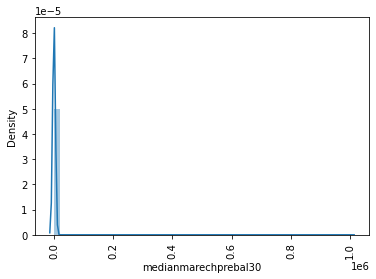

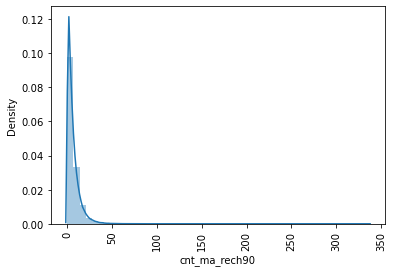

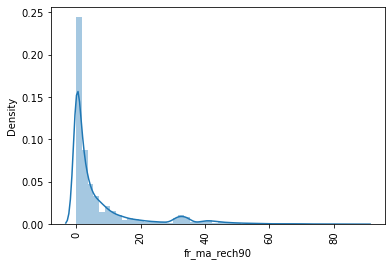

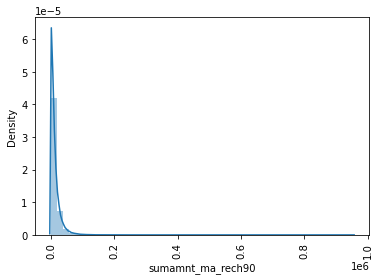

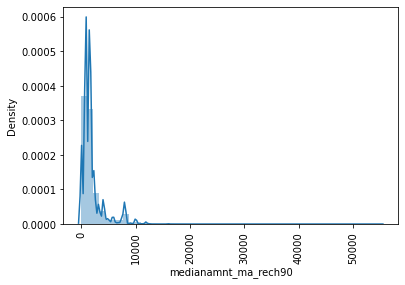

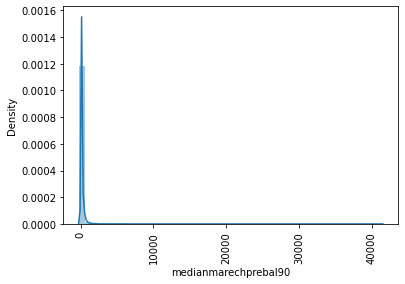

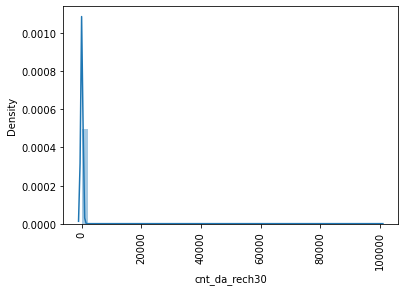

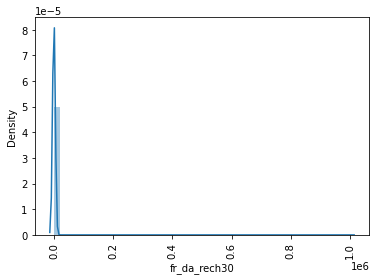

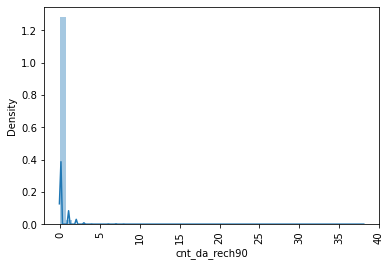

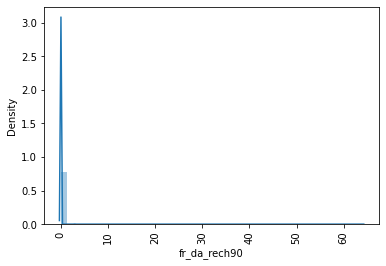

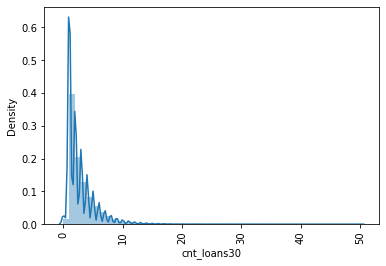

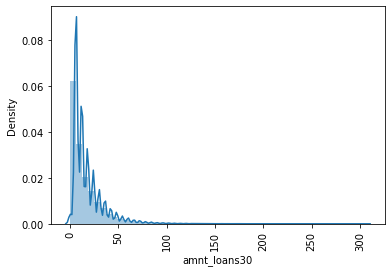

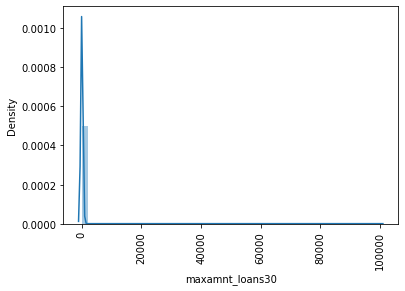

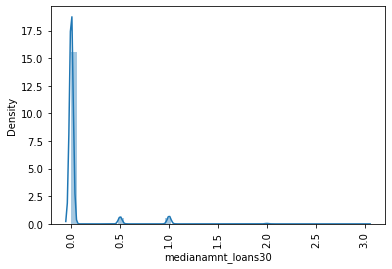

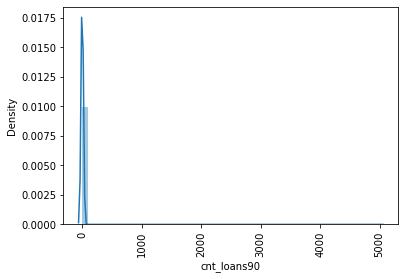

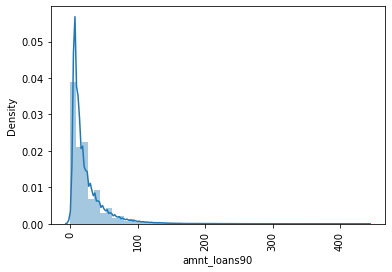

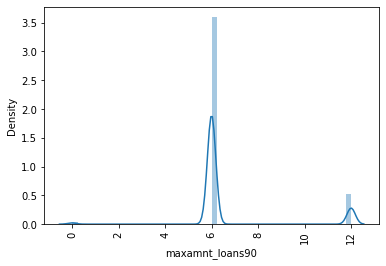

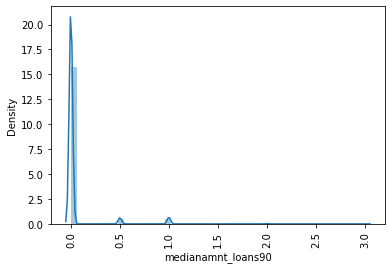

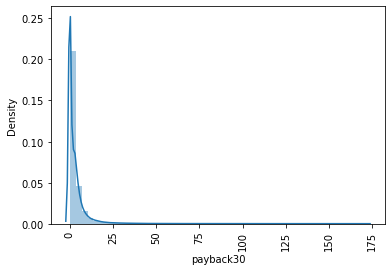

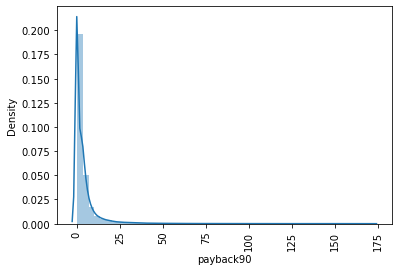

In [20]:
for i in mcd.describe().columns:
    sns.distplot(mcd[i])
    plt.xticks(rotation=90)
    plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

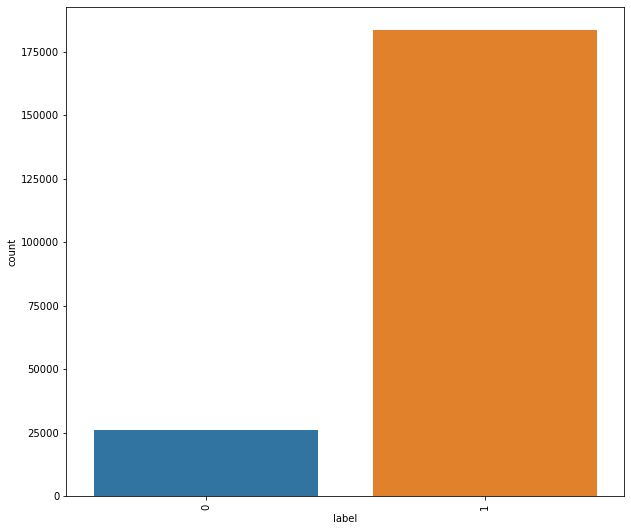

In [21]:
plt.figure(figsize=(10,9))
sns.countplot(mcd.label)
plt.xticks(rotation=90)

In [22]:
mcd.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


<AxesSubplot:>

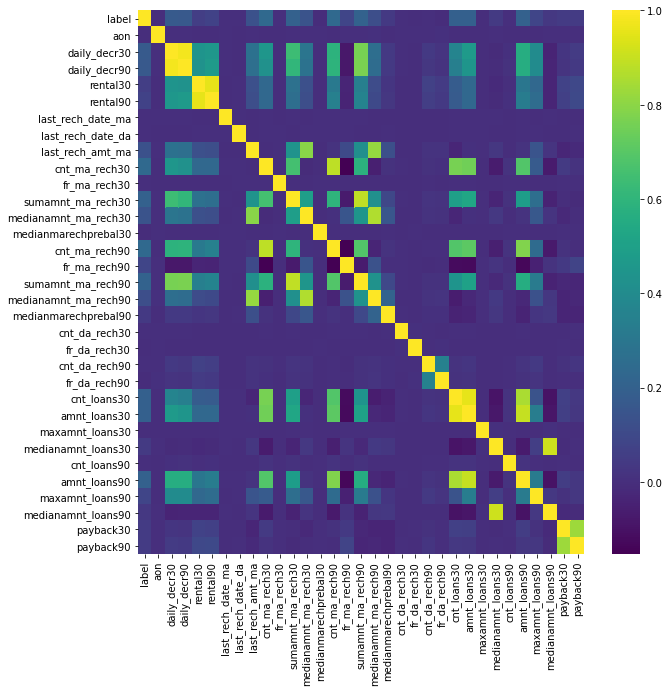

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(mcd.corr(),cmap='viridis')

In [24]:
mcd.corr()['daily_decr30']

label                   0.168298
aon                     0.001104
daily_decr30            1.000000
daily_decr90            0.977704
rental30                0.442066
rental90                0.458977
last_rech_date_ma       0.000487
last_rech_date_da      -0.001636
last_rech_amt_ma        0.275837
cnt_ma_rech30           0.451385
fr_ma_rech30           -0.000577
sumamnt_ma_rech30       0.636536
medianamnt_ma_rech30    0.295356
medianmarechprebal30   -0.001153
cnt_ma_rech90           0.587338
fr_ma_rech90           -0.078299
sumamnt_ma_rech90       0.762981
medianamnt_ma_rech90    0.257847
medianmarechprebal90    0.037495
cnt_da_rech30           0.000700
fr_da_rech30           -0.001499
cnt_da_rech90           0.038814
fr_da_rech90            0.020673
cnt_loans30             0.366116
amnt_loans30            0.471492
maxamnt_loans30        -0.000028
medianamnt_loans30     -0.011610
cnt_loans90             0.008962
amnt_loans90            0.563496
maxamnt_loans90         0.400199
medianamnt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 [Text(0, 0, '2016-07-20'),
  Text(1, 0, '2016-08-10'),
  Text(2, 0, '2016-08-19'),
  Text(3, 0, '2016-06-06'),
  Text(4, 0, '2016-06-22'),
  Text(5, 0, '2016-07-02'),
  Text(6, 0, '2016-07-05'),
  Text(7, 0, '2016-08-05'),
  Text(8, 0, '2016-06-15'),
  Text(9, 0, '2016-06-08'),
  Text(10, 0, '2016-06-12'),
  Text(11, 0, '2016-06-20'),
  Text(12, 0, '2016-06-29'),
  Text(13, 0, '2016-06-16'),
  Text(14, 0, '2016-08-03'),
  Text(15, 0, '2016-06-24'),
  Text(16, 0, '2016-07-04'),
  Text(17, 0, '2016-07-03'),
  Text(18, 0, '2016-07-01'),
  Text(19, 0, '2016-08-08'),
  Text(20, 0, '2016-06-26'),
  Text(21, 0, '2016-06-23'),
  

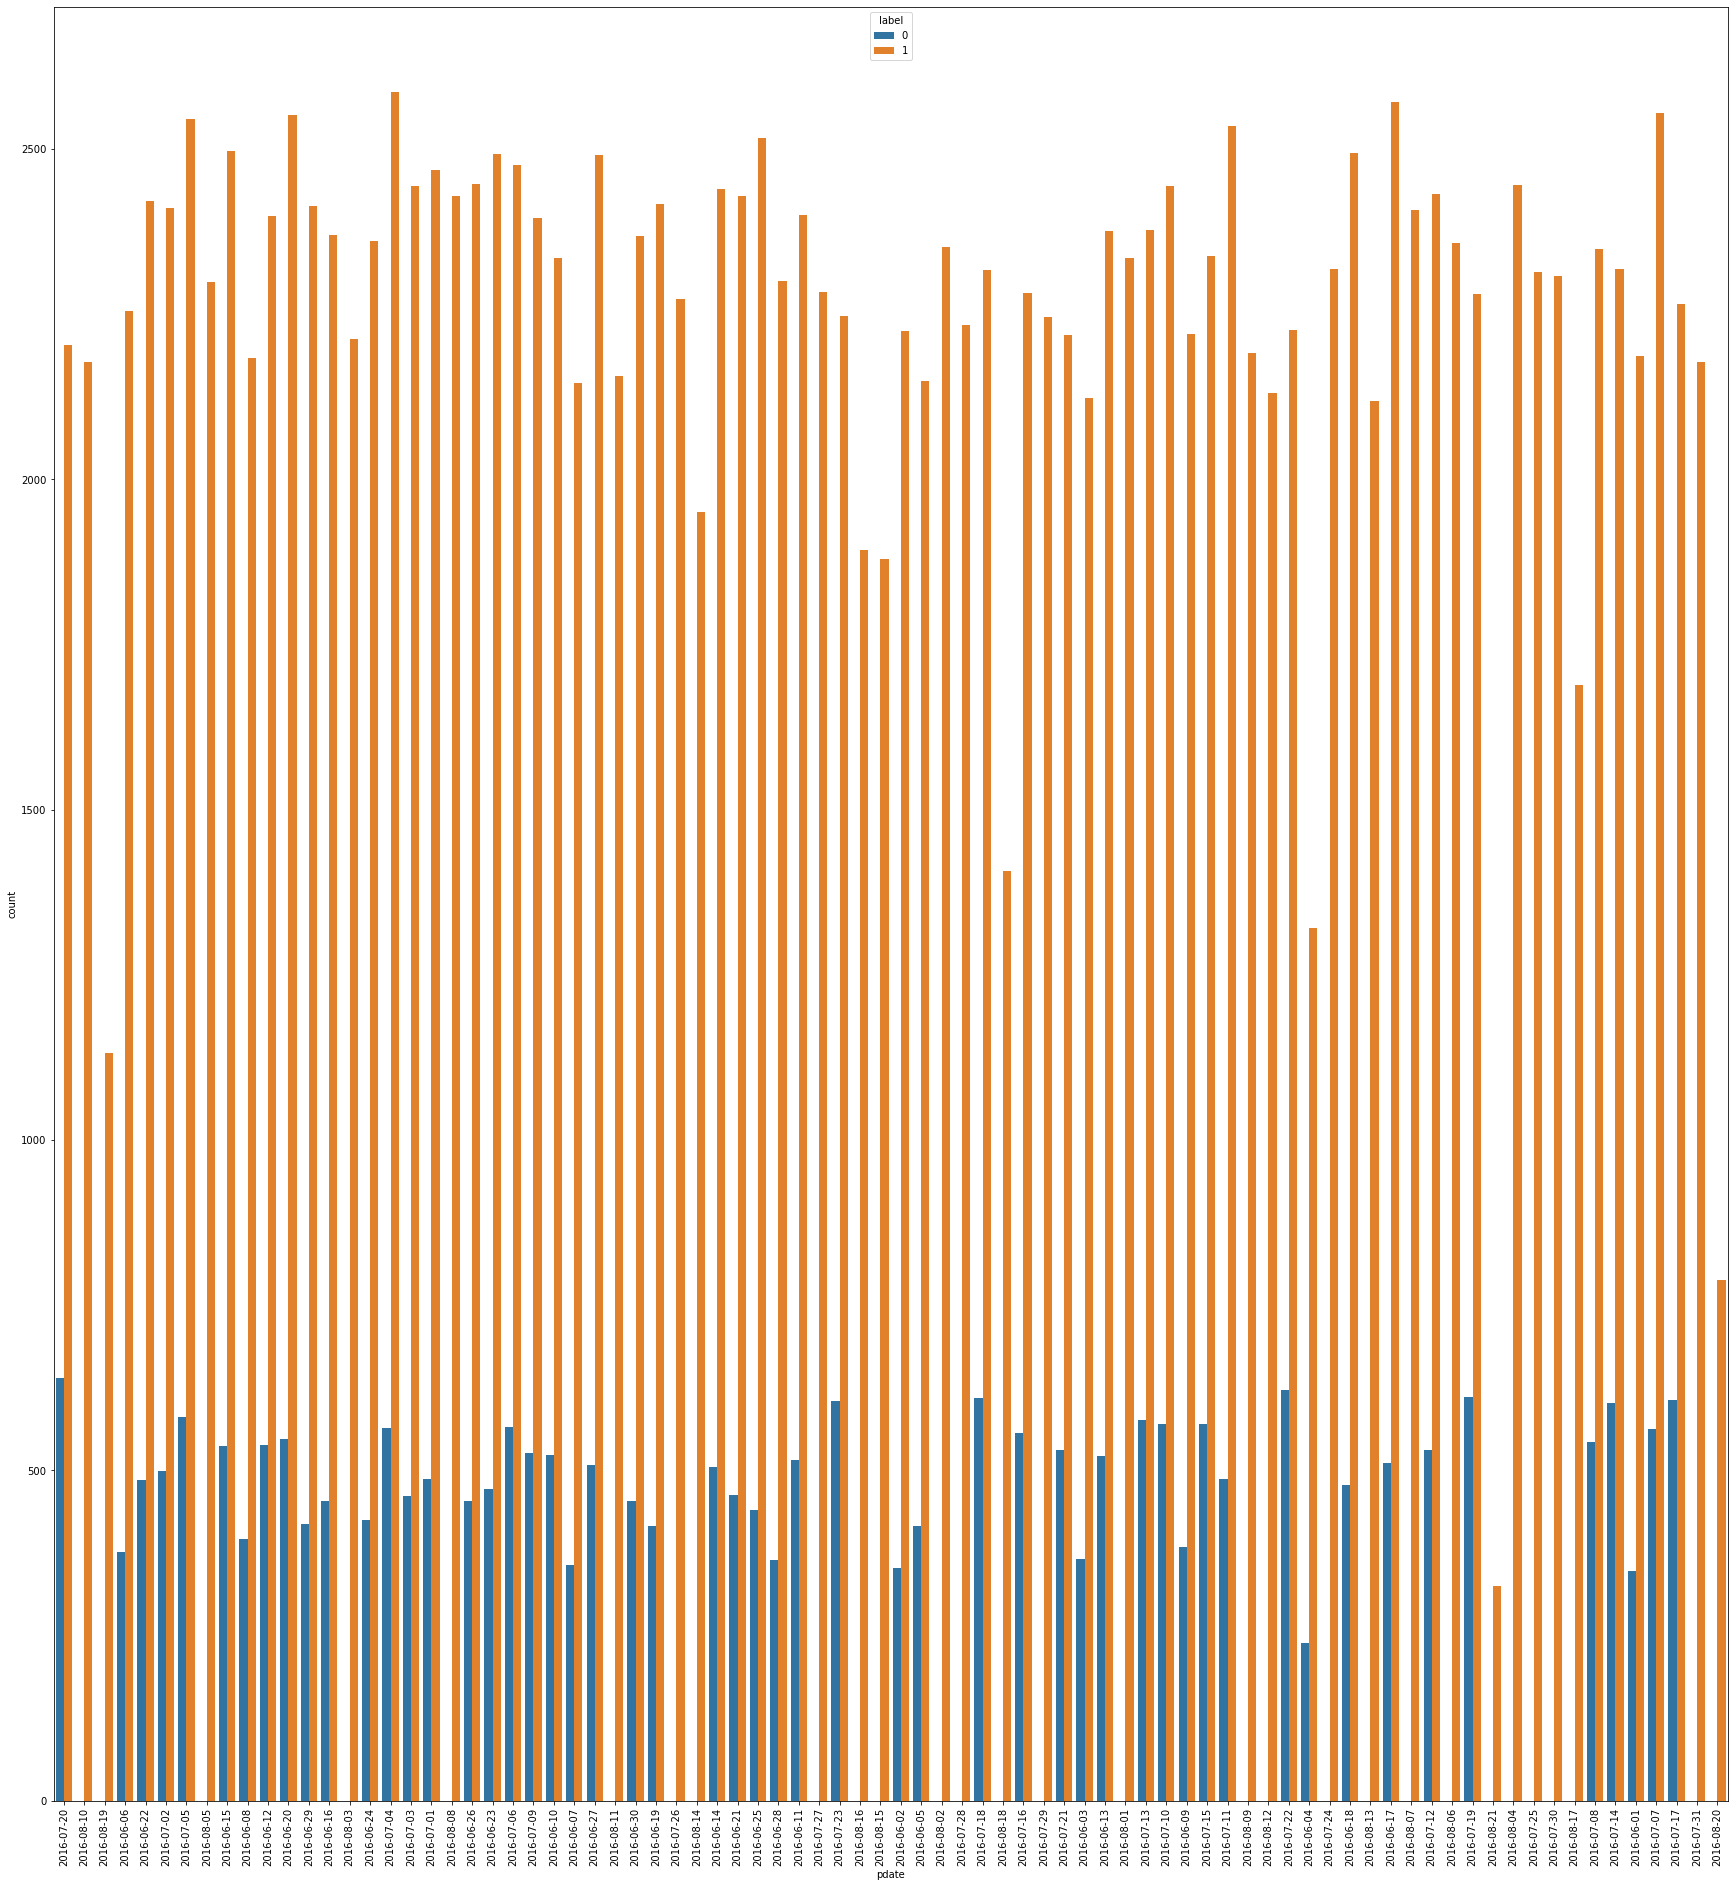

In [25]:
plt.figure(figsize=(30,33))
sns.countplot(x="pdate",hue="label",data=mcd)
plt.xticks(rotation=90)

In [26]:
mcd.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

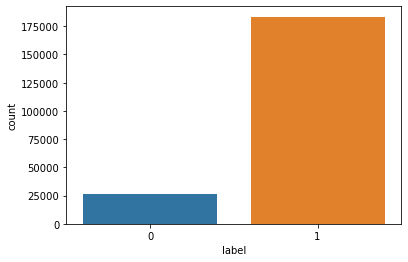

In [27]:
sns.countplot(mcd.label)

<AxesSubplot:xlabel='aon', ylabel='Density'>

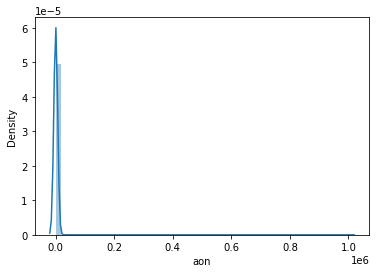

In [28]:
sns.distplot(mcd.aon)

In [29]:
mcd.aon.value_counts()

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
818222.402828      1
603666.669107      1
852238.900959      1
851325.512514      1
913930.093986      1
Name: aon, Length: 4507, dtype: int64

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

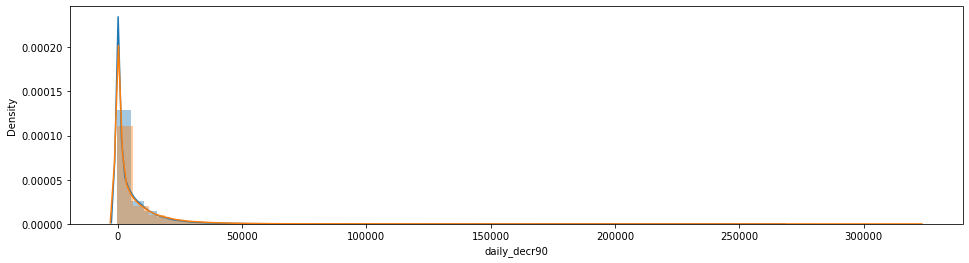

In [30]:
plt.figure(figsize=(16,4))
sns.distplot(mcd.daily_decr30)
sns.distplot(mcd.daily_decr90)

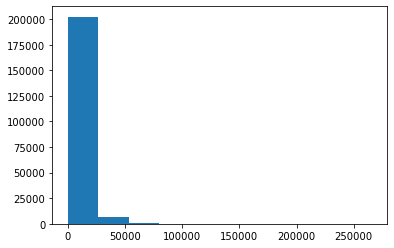

In [31]:
plt.hist(mcd.daily_decr30);

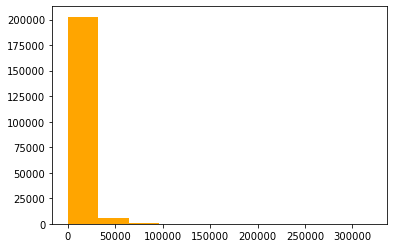

In [32]:
plt.hist(mcd.daily_decr90,color='orange');

In [33]:
mcd[mcd.daily_decr90 > 50000]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
130,1,91716I90841,365.0,44836.000000,52266.890,6394.29,8163.82,1.0,0.0,2309,...,12.0,0.0,25.0,204,12,0.0,1.909091,1.888889,UPW,2016-08-06
201,1,60002I84456,2058.0,39557.000000,54218.950,20929.48,30084.10,1.0,0.0,770,...,12.0,0.0,21.0,132,12,0.0,1.769231,2.625000,UPW,2016-08-12
210,1,94452I70376,311.0,50300.121667,50425.730,6876.70,8651.45,4.0,0.0,8000,...,6.0,0.0,8.0,48,6,0.0,1.750000,2.714286,UPW,2016-07-25
213,1,00180I82736,999.0,46992.000000,55642.080,11529.63,20950.63,2.0,0.0,2309,...,12.0,0.0,5.0,48,12,0.0,7.000000,9.200000,UPW,2016-08-13
279,1,92786I91190,515.0,52099.000000,53448.350,4338.36,5826.66,1.0,0.0,3178,...,6.0,0.0,8.0,48,6,0.0,1.125000,4.888889,UPW,2016-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209217,1,89841I84457,174.0,70815.841333,71078.724,10084.96,12933.26,3.0,26.0,8000,...,12.0,0.0,14.0,108,12,0.0,1.125000,1.230769,UPW,2016-07-23
209226,1,16815I90587,931.0,32598.000000,65449.580,5801.49,4839.56,1.0,0.0,770,...,12.0,0.0,2.0,18,12,0.0,2.000000,2.000000,UPW,2016-08-13
209277,1,00575I85349,165.0,36800.000000,58127.000,4903.20,8794.78,2.0,0.0,1539,...,6.0,0.0,37.0,222,6,0.0,2.210526,1.918919,UPW,2016-08-06
209297,1,89681I70379,339.0,44066.000000,59686.790,6876.45,13617.11,1.0,0.0,1539,...,0.0,0.0,1.0,6,6,0.0,0.000000,1.500000,UPW,2016-08-09


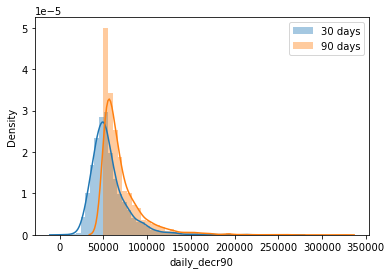

In [34]:
sns.distplot(mcd[mcd.daily_decr90 > 50000]['daily_decr30'],label = '30 days')
sns.distplot(mcd[mcd.daily_decr90 > 50000]['daily_decr90'], label = '90 days')
plt.legend()

In [35]:
sample_loss = len(mcd[mcd.daily_decr90 > 50000])
sample_loss

2091

In [36]:
sample_loss / len(mcd) * 100

0.9976478222078028

<AxesSubplot:xlabel='rental90'>

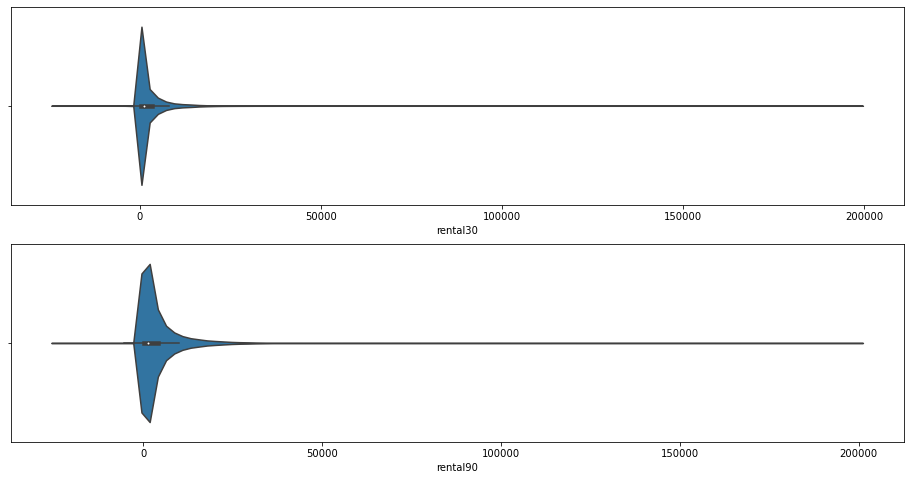

In [37]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.violinplot(mcd.rental30)

fig.add_subplot(212)
sns.violinplot(mcd.rental90)

<AxesSubplot:xlabel='rental90'>

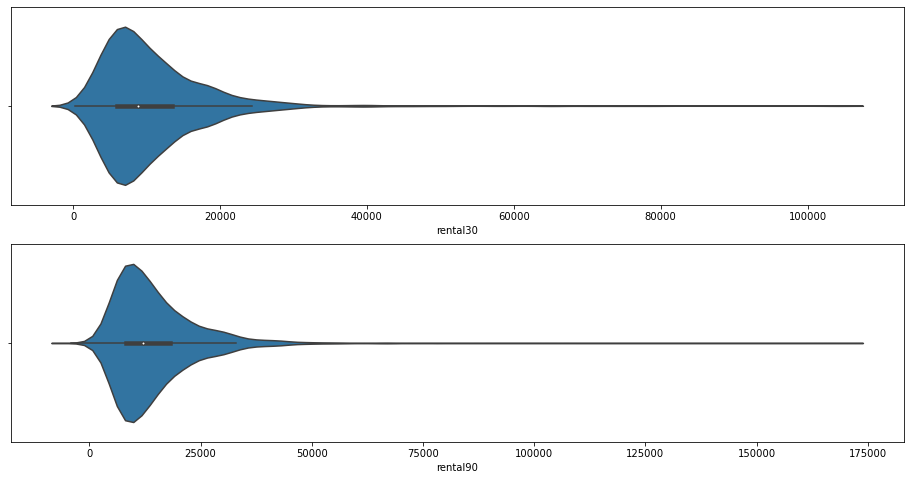

In [38]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.violinplot(mcd[mcd.daily_decr90 > 50000].rental30)

fig.add_subplot(212)
sns.violinplot(mcd[mcd.daily_decr90 > 50000].rental90)

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

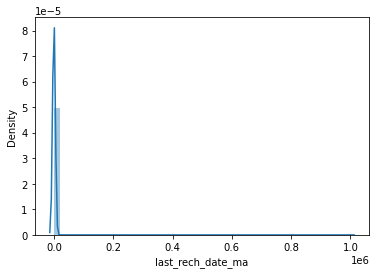

In [39]:
sns.distplot(mcd.last_rech_date_ma)

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

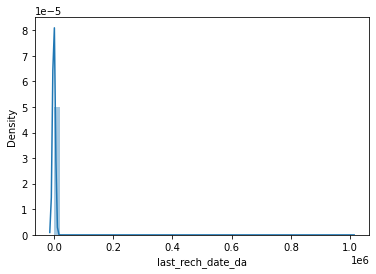

In [40]:
sns.distplot(mcd.last_rech_date_da)

In [41]:
mcd.last_rech_date_ma.describe()

count    209593.000000
mean       3755.847800
std       53905.892230
min         -29.000000
25%           1.000000
50%           3.000000
75%           7.000000
max      998650.377733
Name: last_rech_date_ma, dtype: float64

In [42]:
mcd.last_rech_date_da.describe()

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

In [43]:
mcd.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [44]:
le = LabelEncoder()
mcd['msisdn'] = le.fit_transform(mcd.msisdn.values)
mcd['pcircle'] = le.fit_transform(mcd.pcircle.values)
mcd['pdate'] = le.fit_transform(mcd.pdate.values)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 [Text(1, 0, 'label'),
  Text(2, 0, 'msisdn'),
  Text(3, 0, 'aon'),
  Text(4, 0, 'daily_decr30'),
  Text(5, 0, 'daily_decr90'),
  Text(6, 0, 'rental30'),
  Text(7, 0, 'rental90'),
  Text(8, 0, 'last_rech_date_ma'),
  Text(9, 0, 'last_rech_date_da'),
  Text(10, 0, 'last_rech_amt_ma'),
  Text(11, 0, 'cnt_ma_rech30'),
  Text(12, 0, 'fr_ma_rech30'),
  Text(13, 0, 'sumamnt_ma_rech30'),
  Text(14, 0, 'medianamnt_ma_rech30'),
  Text(15, 0, 'medianmarechprebal30'),
  Text(16, 0, 'cnt_ma_rech90'),
  Text(17, 0, 'fr_ma_rech90'),
  Text(18, 0, 'sumamnt_ma_rech90'),
  Text(19, 0, 'medianamnt_ma_rech90'),
  Text(20, 0, 'medianmarechprebal90'),
  Text(21, 0, 'cnt_da_rech30'),
  Text(22, 0, 'fr_da_rech30'),
  Text(23, 0, 'cnt_da_rech90'),
  Text(24, 0, 'fr_da_rech90'),
  Text(25, 0, 'cnt_loans30'),
  Text(26, 0, 'amnt_loans30'),
  Te

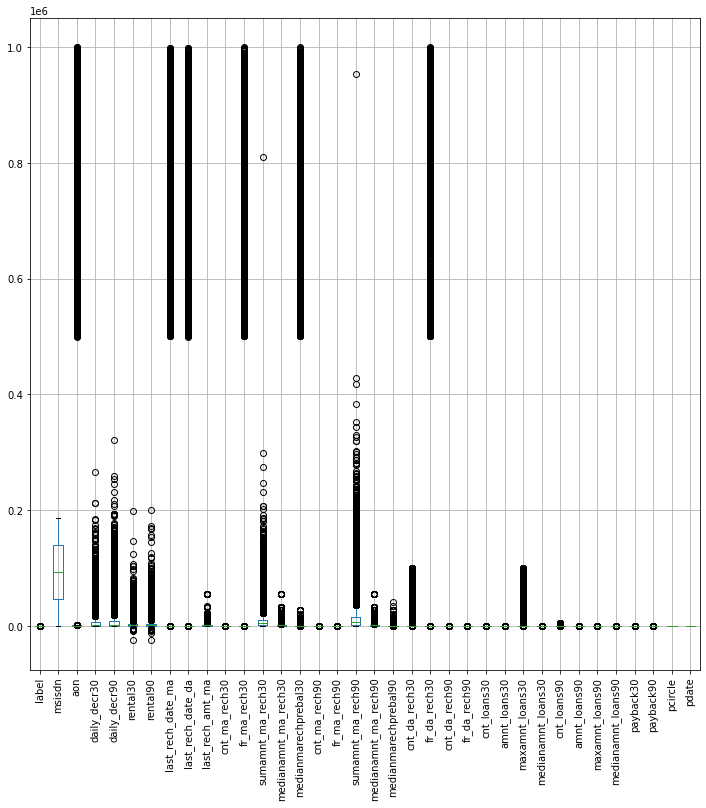

In [45]:
mcd.boxplot(figsize=(12,12));
plt.xticks(rotation=90)

In [46]:
mcd.drop('pcircle', axis=1, inplace= True)

In [47]:
mcd

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,49
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,70
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,79
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,5
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,16
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,11
209590,1,53995,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,58
209591,1,111388,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,54


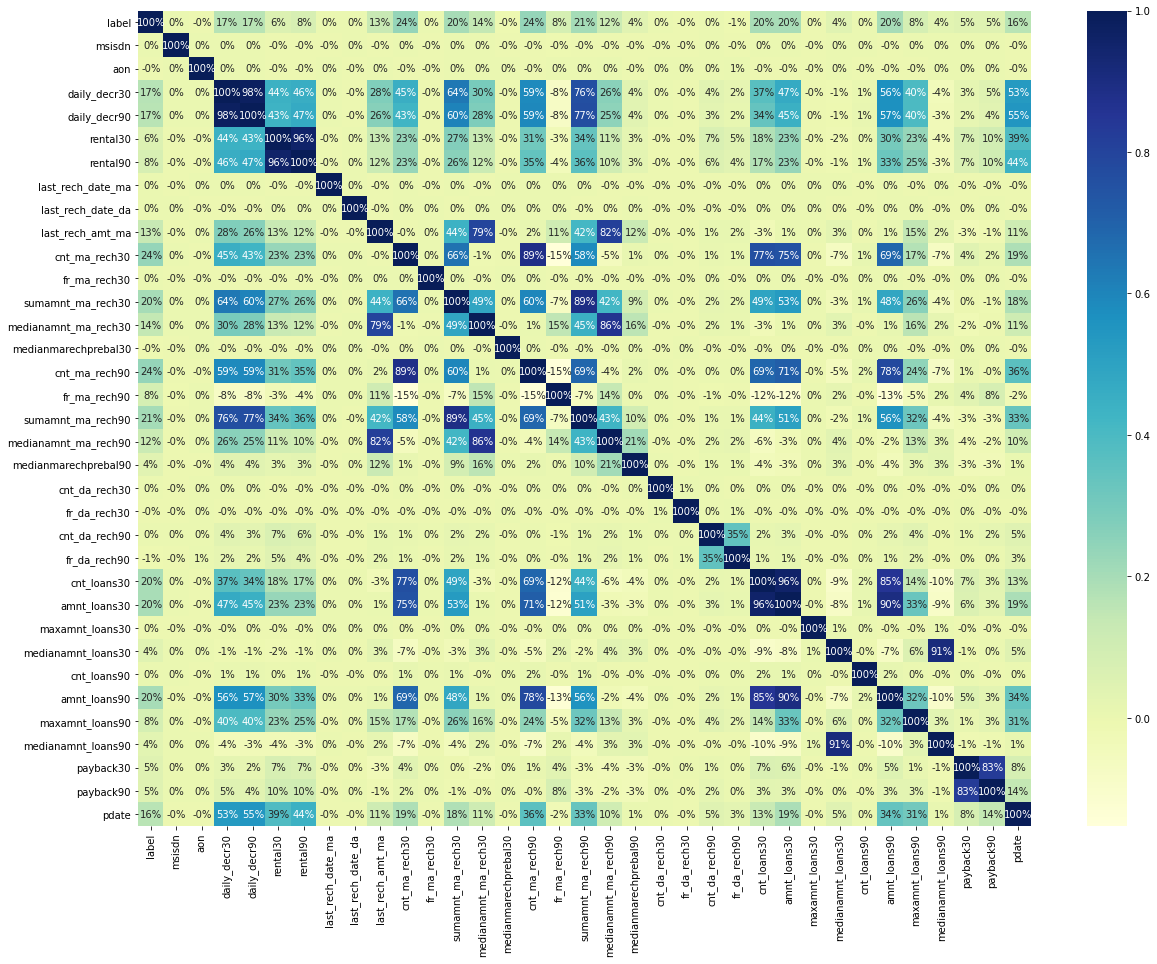

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(mcd.corr(),vmax=1,cmap='YlGnBu',annot=True,fmt='.0%')
plt.show()

In [49]:
y = mcd['label']
x = mcd.drop('label', axis=1)

In [50]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.43, random_state=0)
x.shape

(209593, 34)

In [51]:
y.shape

(209593,)

In [52]:
model=[LogisticRegression(), GaussianNB(var_smoothing=1e-09), DecisionTreeClassifier(),
       KNeighborsClassifier(weights='uniform',leaf_size=50,n_neighbors=5),SVC(),
       RandomForestClassifier(criterion='entropy',n_estimators=150,min_samples_leaf=4)]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_train)
    print('Accuracy Score of',m,'is :')
    print(accuracy_score(y_train,predm),'\n')
    print('Confusion Matrix',confusion_matrix(y_train,predm),'\n')
    print('Classification Report',classification_report(y_train,predm))
    print('\n')

Accuracy Score of LogisticRegression() is :
0.877205611544514 

Confusion Matrix [[   517  14306]
 [   364 104281]] 

Classification Report               precision    recall  f1-score   support

           0       0.59      0.03      0.07     14823
           1       0.88      1.00      0.93    104645

    accuracy                           0.88    119468
   macro avg       0.73      0.52      0.50    119468
weighted avg       0.84      0.88      0.83    119468



Accuracy Score of GaussianNB() is :
0.5529597883952188 

Confusion Matrix [[13241  1582]
 [51825 52820]] 

Classification Report               precision    recall  f1-score   support

           0       0.20      0.89      0.33     14823
           1       0.97      0.50      0.66    104645

    accuracy                           0.55    119468
   macro avg       0.59      0.70      0.50    119468
weighted avg       0.88      0.55      0.62    119468



Accuracy Score of DecisionTreeClassifier() is :
1.0 

Confusion Matrix [[

In [53]:
import joblib
joblib.dump(DecisionTreeClassifier(),'MCP_Data_File.obj')

['MCP_Data_File.obj']

In [54]:
lr=LogisticRegression()
max_score=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20,stratify=y)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy score at',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('max accuracy is ',max_score,'at',final_state)

accuracy score at 0 is 0.8764522054438322
accuracy score at 1 is 0.8764044943820225
accuracy score at 2 is 0.8765953386292612
accuracy score at 3 is 0.8762136501347837
accuracy score at 4 is 0.8763329277893079
accuracy score at 5 is 0.8773587156182161
accuracy score at 6 is 0.8761897946038789
accuracy score at 7 is 0.8759750948257353
accuracy score at 8 is 0.8759750948257353
accuracy score at 9 is 0.8769054605310241
accuracy score at 10 is 0.8767623273455951
accuracy score at 11 is 0.8762613611965935
accuracy score at 12 is 0.8764044943820225
accuracy score at 13 is 0.8763329277893079
accuracy score at 14 is 0.8761420835420692
accuracy score at 15 is 0.8761420835420692
accuracy score at 16 is 0.8768338939383096
accuracy score at 17 is 0.8761897946038789
accuracy score at 18 is 0.8765237720365466
accuracy score at 19 is 0.8763090722584032
accuracy score at 20 is 0.8761897946038789
accuracy score at 21 is 0.8763090722584032
accuracy score at 22 is 0.8763806388511176
accuracy score at 23 

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20,stratify=y)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
test_accuracy=accuracy_score(y_test,y_pred)
train_accuracy=accuracy_score(y_train,train_pred)
train_accuracy,test_accuracy

(0.876325488746019, 0.8763329277893079)

In [58]:
Gn=GaussianNB()
max_score=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20,stratify=y)
    Gn.fit(x_train,y_train)
    G_pred=Gn.predict(x_test)
    accuracy=accuracy_score(y_test,G_pred)
    print('accuracy score at',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('max accuracy is ',max_score,'at',final_state)

accuracy score at 0 is 0.5554521815883012
accuracy score at 1 is 0.5535198835850091
accuracy score at 2 is 0.5557145924282545
accuracy score at 3 is 0.5512774636799542
accuracy score at 4 is 0.5537822944249624
accuracy score at 5 is 0.5515398745199075
accuracy score at 6 is 0.5536630167704383
accuracy score at 7 is 0.5565733915408287
accuracy score at 8 is 0.5551659152174432
accuracy score at 9 is 0.5545218158830125
accuracy score at 10 is 0.5524225291633865
accuracy score at 11 is 0.5567642357880674
accuracy score at 12 is 0.5549035043774899
accuracy score at 13 is 0.5563586917626852
accuracy score at 14 is 0.5510389083709057
accuracy score at 15 is 0.5574560461843079
accuracy score at 16 is 0.5512058970872397
accuracy score at 17 is 0.548915766120375
accuracy score at 18 is 0.558624967198645
accuracy score at 19 is 0.5544741048212029
accuracy score at 20 is 0.5544025382284883
accuracy score at 21 is 0.5544741048212029
accuracy score at 22 is 0.5543071161048689
accuracy score at 23 is

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [60]:
lr_TS_auc=roc_auc_score(y_test,y_pred)
lr_TR_auc=roc_auc_score(y_train,train_pred)

In [61]:
lr_TS_auc,lr_TR_auc

(0.514993147774016, 0.5138069619192319)

In [62]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [63]:
fpr

array([0.        , 0.96655199, 1.        ])

In [64]:
tpr

array([0.        , 0.99653828, 1.        ])

In [65]:
thresholds

array([2, 1, 0], dtype=int64)

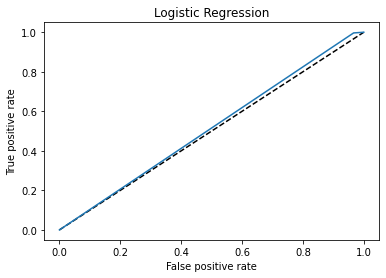

In [66]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

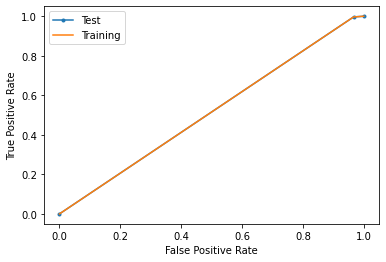

In [67]:
plt.plot(fpr,tpr,marker='.',label='Test')
plt.plot(fpr,tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [68]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [69]:
print(auc_score)

0.514993147774016


In [70]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))

0.8812233116248002


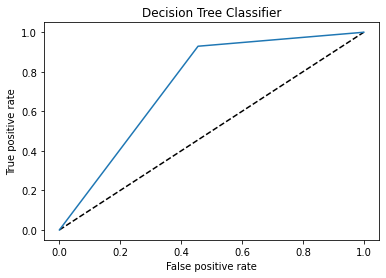

0.7368864396007585

In [71]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

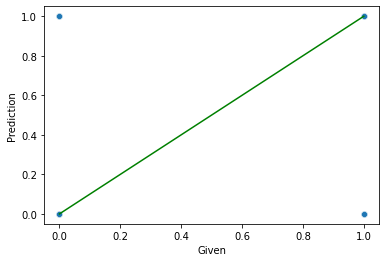

In [72]:
k = sns.scatterplot(y_test, y_pred)
k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,1,5)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='g')

In [73]:
target1=pd.DataFrame({'Actual ':y_test,'Predicted ':y_pred})
target1

,Actual,Predicted
83337,1,1
148519,0,1
57079,1,1
79145,0,1
54578,1,1
...,...,...
42118,1,1
135030,1,1
100107,1,1
124998,1,1


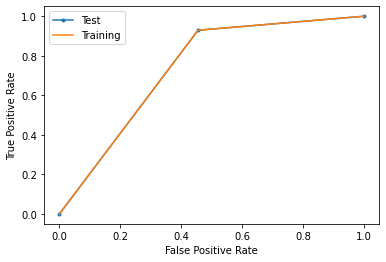

In [74]:
plt.plot(fpr,tpr,marker='.',label='Test')
plt.plot(fpr,tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

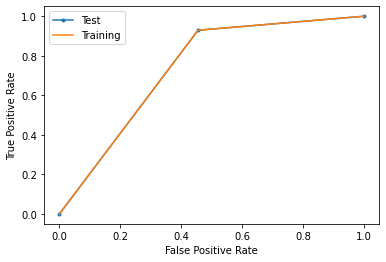

In [75]:
plt.plot(fpr,tpr,marker='.',label='Test')
plt.plot(fpr,tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()